In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("covid_19_india.csv",parse_dates=["Date"],dayfirst=True)
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [3]:
df=df[["Date","State/UnionTerritory","Cured","Deaths","Confirmed"]]
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [4]:
df.columns=["date","state","cured","deaths","confirmed"]
df.head()

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [5]:
dh=df[df["state"]=="Delhi"]
dh.head()

,date,state,cured,deaths,confirmed
34,2020-03-02,Delhi,0,0,1
38,2020-03-03,Delhi,0,0,1
42,2020-03-04,Delhi,0,0,1
45,2020-03-05,Delhi,0,0,2
51,2020-03-06,Delhi,0,0,3


In [6]:
import datetime as dt

In [7]:
dh["date"]=dh["date"].map(dt.datetime.toordinal)
dh.head()

<ipython-input-7-55fe1d92c1f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dh["date"]=dh["date"].map(dt.datetime.toordinal)


,date,state,cured,deaths,confirmed
34,737486,Delhi,0,0,1
38,737487,Delhi,0,0,1
42,737488,Delhi,0,0,1
45,737489,Delhi,0,0,2
51,737490,Delhi,0,0,3


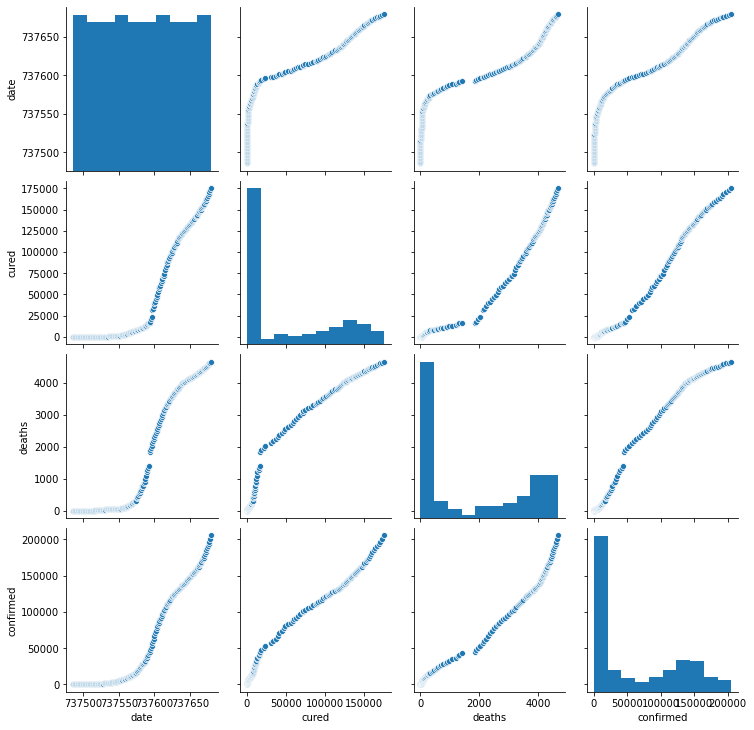

In [8]:
sns.pairplot(dh[["date","state","cured","deaths","confirmed"]])

# Now,Transform the data

In [9]:
dh["transconf"]=np.log(dh["confirmed"])
dh.head()

<ipython-input-9-819a192a901f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dh["transconf"]=np.log(dh["confirmed"])


,date,state,cured,deaths,confirmed,transconf
34,737486,Delhi,0,0,1,0.000000
38,737487,Delhi,0,0,1,0.000000
42,737488,Delhi,0,0,1,0.000000
45,737489,Delhi,0,0,2,0.693147
51,737490,Delhi,0,0,3,1.098612


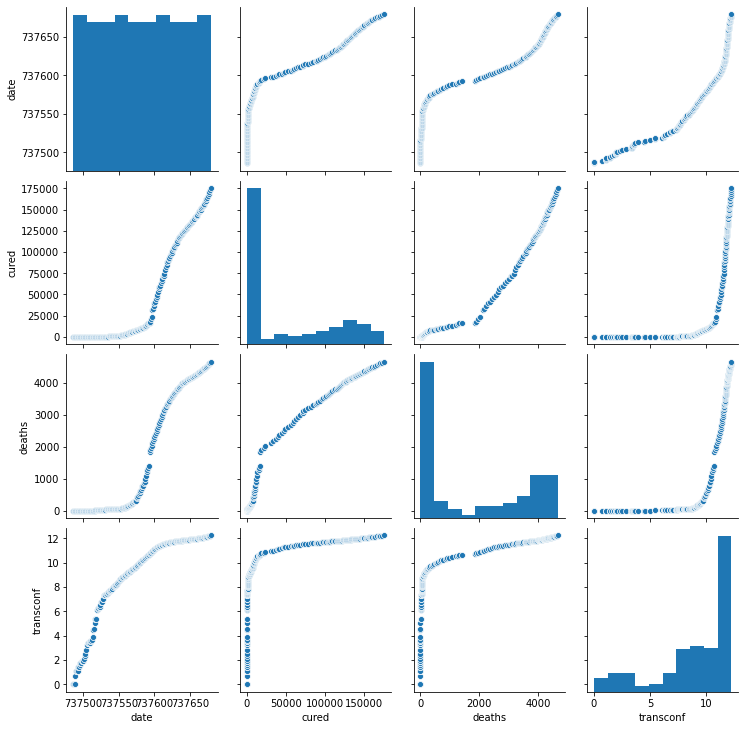

In [10]:
sns.pairplot(dh[["date","state","cured","deaths","transconf"]])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [12]:
x=dh[["date"]]
y=dh[["transconf"]]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)


In [13]:
model1=LinearRegression()

In [14]:
model1.fit(xtrain,ytrain)

LinearRegression()

In [15]:
Accuracy1=model1.score(xtrain,ytrain)
Accuracy1

0.8364146693832659

In [16]:
ypred1=model1.predict(xtest)

In [17]:
ypred1

array([[ 6.59974706],
       [10.18239821],
       [ 8.87961597],
       [12.08228898],
       [ 9.58528969],
       [ 4.21131295],
       [12.6793975 ],
       [ 7.63111633],
       [11.21376748],
       [11.1052023 ],
       [ 8.01109448],
       [ 8.98818116],
       [13.60220159],
       [ 8.28250745],
       [ 4.86270407],
       [12.46226713],
       [11.8651586 ],
       [ 7.30542077],
       [ 8.17394226],
       [ 3.8313348 ],
       [ 7.73968152],
       [10.67094155],
       [ 9.91098525],
       [13.54791899],
       [ 7.46826855],
       [ 7.57683374],
       [ 4.04846517],
       [ 5.51409519],
       [13.16794084],
       [ 6.05692112],
       [ 8.49963782],
       [ 9.36815931],
       [ 9.74813747],
       [10.34524599],
       [ 6.97972521],
       [ 4.75413889],
       [ 4.97126926],
       [ 6.32833409],
       [ 4.6455737 ]])

In [18]:
ytest

,transconf
1261,7.773174
3539,11.327523
2674,10.126791
4784,11.832666
3143,10.760071
98,1.609438
5169,11.914784
1877,8.941022
4223,11.696138
4151,11.669869


In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [20]:
Er1=mean_squared_error(ypred1,ytest)
Er1


2.1029723044777016

In [21]:
mae1=mean_absolute_error(ypred1,ytest)
mae1

1.287730585230028

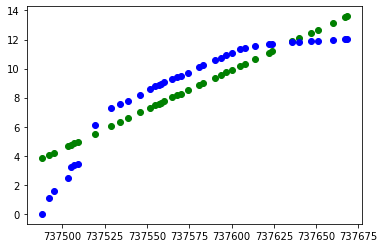

In [22]:
plt.scatter(xtest,ypred1,color="g")
plt.scatter(xtest,ytest,color="b")

In [23]:
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor(criterion="mae",splitter="random")

In [24]:
model2.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='mae', splitter='random')

In [25]:
Accuracy2=model2.score(xtrain,ytrain)
Accuracy2

1.0

In [26]:
ypred2=model2.predict(xtest)
ypred2

array([ 7.71779621, 11.29212916, 10.07090696, 11.83849563, 10.8193582 ,
        1.79175947, 11.90836717,  8.98694679, 11.70834421, 11.68389112,
        9.21572584, 10.22752566, 12.07110022,  9.55059118,  3.40119738,
       11.87845013, 11.80859803,  8.69617585,  9.46575748,  0.69314718,
        8.98694679, 11.56041955, 11.16180649, 12.07110022,  8.75115798,
        8.84260448,  1.09861229,  5.38907173, 11.97416581,  7.35308192,
        9.76342056, 10.51390509, 10.99785752, 11.37779279,  8.14293601,
        2.83321334,  3.58351894,  7.44249272,  2.83321334])

In [27]:
Er2=mean_squared_error(ypred2,ytest)
Er2

0.03594055902439341

In [28]:
mae2=mean_absolute_error(ypred2,ytest)
mae2

0.09422462705781165

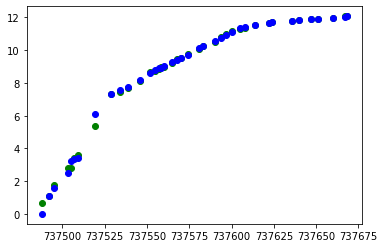

In [29]:
plt.scatter(xtest,ypred2,color="g")
plt.scatter(xtest,ytest,color="b")

In [30]:
from sklearn.svm import SVR
model3=SVR(C=100)

In [31]:
model3.fit(xtest,ytest)

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=100)

In [32]:
Accuracy3=model3.score(xtrain,ytrain)
Accuracy3

0.9966171450064416

In [33]:
ypred3=model3.predict(xtest)
ypred3

array([ 7.8735752 , 11.24186236, 10.16945551, 11.86798099, 10.857813  ,
        1.42910908, 12.01522082,  8.84462117, 11.60662873, 11.57482149,
        9.20835733, 10.28814316, 11.96329683,  9.49693374,  3.53111335,
       11.97088337, 11.80232515,  8.56249742,  9.37895127,  0.51909688,
        8.94372946, 11.44035452, 11.09049907, 11.98041246,  8.70161503,
        8.79629695,  0.99872471,  5.65724686, 12.04669712,  7.00534332,
        9.74007199, 10.67034249, 10.98147048, 11.31684559,  8.27669569,
        3.15809613,  3.90442008,  7.4935186 ,  2.78912066])

In [34]:
Er3=mean_squared_error(ypred3,ytest)
Er3

0.029022263874146772

In [35]:
mae3=mean_absolute_error(ypred3,ytest)
mae3

0.12046304992480476

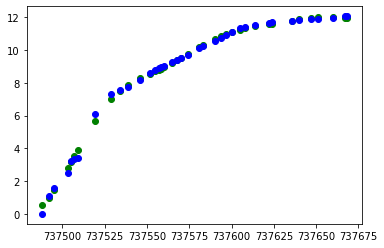

In [36]:
plt.scatter(xtest,ypred3,color="g")
plt.scatter(xtest,ytest,color="b")

In [37]:
print(Accuracy1)
print(Accuracy2)
print(Accuracy3)

0.8364146693832659
1.0
0.9966171450064416


In [38]:
print(Er1)
print(Er2)
print(Er3)

2.1029723044777016
0.03594055902439341
0.029022263874146772


In [39]:
print(mae1)

1.287730585230028


In [40]:
Res=pd.DataFrame({"Model":["Linear Regression","Desicion Tree","SVR"],"Accuracy":[Accuracy1,Accuracy2,Accuracy3],"MSE":[Er1,Er2,Er3],"MAE":[mae1,mae2,mae3]},index=[1,2,3])
Res

,Model,Accuracy,MSE,MAE
1,Linear Regression,0.836415,2.102972,1.287731
2,Desicion Tree,1.000000,0.035941,0.094225
3,SVR,0.996617,0.029022,0.120463


In [41]:
Res.to_csv("Results for Regression Models(Delhi).csv",index=False)

In [42]:
Res1=pd.read_csv("Results for Regression Models(Delhi).csv")
Res1

,Model,Accuracy,MSE,MAE
0,Linear Regression,0.836415,2.102972,1.287731
1,Desicion Tree,1.000000,0.035941,0.094225
2,SVR,0.996617,0.029022,0.120463
